# Stiff Differential Equations

During the numerical solution of initial value problems for ordinary differential equations, it is often observed that explicit numerical schemes fail to work efficiently or at all due to the need to significantly reduce the step size to achieve the desired accuracy. In such cases, the differential equation is said to be *stiff*.

**Instead of Definition:** The above definition of stiff differential equations seems to be rough and inaccurate, but the fact is that there is no generally accepted exact definition of this concept yet. In the literature, stiff equations are usually described along different approaches:

1. equations for which explicit schemes do not work (efficiently) enough;
2. the step size is determined not by the desired accuracy but by stability criteria;
3. in the same sense: to achieve a given accuracy, the step size should be reduced not only where the solution oscillates greatly, but also where the solution is otherwise smooth;
4. this may shed light on the cause: the solutions change slowly, but the nearby integral curves move away from each other quickly, so it is important to choose a small step size;
5. mostly a mathematical definition, which is still not precise enough and not applicable in all cases: an autonomous system $\dot{x}=f(x)$ is stiff if for all eigenvalues $\lambda_i$ of the Jacobi matrix $\partial_x f$ at every point, $Re(\lambda_i)\le 0$ and the *stiffness ratio* $S=\frac{\max_i |\lambda_i|}{\min_i |\lambda_i|}$ satisfies $S\gg 1$.

**Note:** There is an example where two different differential equation systems have the same analytical solution, but while one equation is stiff, the other is not. Therefore, it is important to emphasize that stiffness characterizes the behavior of the differential equation in numerical solutions, not the solution itself.

Implicit schemes are generally well-suited for solving stiff equations. Scipy offers three implicit solvers for stiff equations: 'Radau', 'BDF', and 'LSODA', the latter of which automatically switches between an explicit and an implicit scheme (stiffness detection).

In the following example, we will solve a stiff differential equation with two different numerical schemes (explicit and implicit) and compare the results obtained.

## Example: Robertson's Autocatalytic Chemical Reaction

One of the classic examples of stiff differential equations is the Robertson autocatalytic process, which describes the conversion of three substances, $X$, $Y$, and $Z$, into each other according to the following equations:

\begin{align}
X &\stackrel{k_1}{\longrightarrow} Y \\
Y + Y &\stackrel{k_2}{\longrightarrow} Z + Y\\
Y + Z &\stackrel{k_3}{\longrightarrow} X + Z,
\end{align}

where the reaction rate constants $k_1=0.04$, $k_2=3.0\times 10^7$, and $k_3=1.0\times 10^4$ in Robertson's example are shown above the arrows. The interpretation of the above equation system is:

* The substance $X$ is capable of transforming itself into substance $Y$ (1), but this reaction can be reversed in the presence of substance $Z$, where $Z$ acts as a catalyst in the reverse process (3). /This does not exist in reality -- ed./

* Substance $Y$ catalyzes its own transformation into substance $Z$.

The differential equation system for the Robertson model is:
\begin{align}
\dot{x} &= -0.04x+10^4 yz\\
\dot{y} &= 0.04x -10^4 yz -3\times 10^7 y^2 \\
\dot{z} &= 3\times 10^7 y^2
\end{align}

The following program compares two different ODE integrator functions in SciPy:

* The 'RK45' solver corresponds to the MATLAB ode45 solver, an explicit fourth-fifth order Runge-Kutta method with adaptive step size selection, which is not suitable for solving stiff differential equations.

* 'Radau', on the other hand, is a fifth-order implicit Runge-Kutta method that handles stiff equations well.

From the simulation reports, it can be seen that the 'RK45' explicit solver calculates the right-hand side of the equation in orders of magnitude more points than the implicit solver, and due to the adaptive step size selection, it generates errors as the step size decreases below the machine precision.



4-5th order Runge-Kutta method with adaptive step size selection:
Number of function evaluations: 3152
Numerical integration of the differential equation encountered a problem.
Required step size is less than spacing between numbers.

5th order implicit Runge-Kutta method:
Number of function evaluations: 248
Numerical integration of the differential equation was successful.
The solver successfully reached the end of the integration interval.


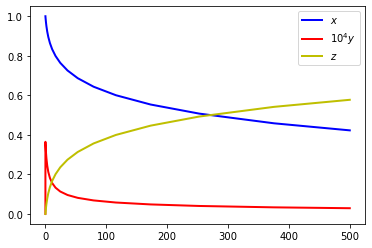

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def report(s):
    """
    Differential equation solver reporting function
    """
    
    print("Number of function evaluations: " + str(s.nfev))
    
    if s.success:
        print("Numerical integration of the differential equation was successful.")
    else:
        print("Numerical integration of the differential equation encountered a problem.")
        
    print(s.message)
    
k1 = 0.04
k2 = 3.e7
k3 = 1.e4

robertson = lambda t, r: np.array([-k1*r[0] + k3*r[1]*r[2], 
                                    k1*r[0] - k3*r[1]*r[2] - k2*r[1]**2.0,
                                    k2*r[1]**2.0])

r0 = np.array([1.0, 0.0, 0.0])

print("\n4-5th order Runge-Kutta method with adaptive step size selection:")
sol = solve_ivp(robertson, (0, 500), r0, method='RK45')
report(sol)

print("\n5th order implicit Runge-Kutta method:")
sol = solve_ivp(robertson, (0, 500), r0, method='Radau')
report(sol)

# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(sol.t, sol.y[0],'b-',lw=2,label='$x$')
ax.plot(sol.t, 1e4*sol.y[1],'r-',lw=2,label='$10^4 y$')
ax.plot(sol.t, sol.y[2],'y-',lw=2,label='$z$')

ax.legend();


## My Task

Let's search for a stiff differential equation that occurs in engineering or physical applications and try to integrate it using explicit and implicit schemes.


## Van der Pol oscillator

One example of a stiff differential equation that arises in engineering and physical applications is the Van der Pol oscillator equation, which describes the behavior of certain electrical circuits and other oscillatory systems. The Van der Pol oscillator equation is given by:

$$\frac{d^2 y}{dt^2} - \mu (1 - y^2) \frac{dy}{dt} + y = 0$$

where y is the dependent variable, $\mu$ is a constant parameter, indicating the nonlinearity and the strength of the damping.

To solve this differential equation numerically, we can use the same explicit and implicit numerical methods as before in Robertson's Chemical Reaction model:


4-5th order Runge-Kutta method with adaptive step size selection:
Number of function evaluations: 62318
Numerical integration of the differential equation was successful.
The solver successfully reached the end of the integration interval.

5th order implicit Runge-Kutta method:
Number of function evaluations: 555
Numerical integration of the differential equation was successful.
The solver successfully reached the end of the integration interval.


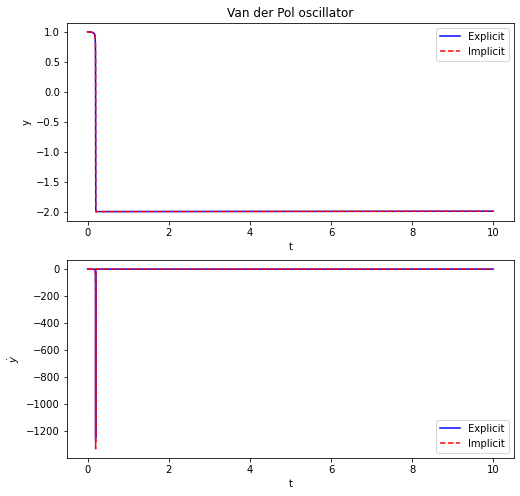

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def report(s):
    """
    Differential equation solver reporting function
    """
    
    print("Number of function evaluations: " + str(s.nfev))
    
    if s.success:
        print("Numerical integration of the differential equation was successful.")
    else:
        print("Numerical integration of the differential equation encountered a problem.")
        
    print(s.message)

# Van der Pol oscillator parameters
mu = 1000

vanderpol = lambda t, y: np.array([y[1], mu*(1 - y[0]**2)*y[1] - y[0]])

# Initial conditions
y0 = [1.0, 0.0]

# Time span
tspan = [0, 10]

# Solve using explicit Runge-Kutta method (RK45)
print("\n4-5th order Runge-Kutta method with adaptive step size selection:")
sol_exp = solve_ivp(vanderpol, tspan, y0, method='RK45')
report(sol_exp)

# Solve using implicit Radau method
print("\n5th order implicit Runge-Kutta method:")
sol_imp = solve_ivp(vanderpol, tspan, y0, method='Radau')
report(sol_imp)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot the position vs. time
axs[0].plot(sol_exp.t, sol_exp.y[0],'b-', label='Explicit')
axs[0].plot(sol_imp.t, sol_imp.y[0],'r--', label='Implicit')
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].set_title('Van der Pol oscillator')
axs[0].legend()

# Plot the velocity vs. time
axs[1].plot(sol_exp.t, sol_exp.y[1], 'b-',label='Explicit')
axs[1].plot(sol_imp.t, sol_imp.y[1],'r--', label='Implicit')
axs[1].set_xlabel('t')
axs[1].set_ylabel('$\dot{y}$')
axs[1].legend()

plt.show()


## Explaination



In mathematics, a stiff equation is a differential equation for which certain numerical methods for solving the equation are numerically unstable, unless the step size is taken to be extremely small.
 
The code solves the ODE using two different numerical methods, an explicit Runge-Kutta method with adaptive step size selection (RK45) and an implicit Radau method. It compares the results of the two methods by plotting the position and velocity of the oscillator over time.

When the value of the parameter $\mu$ is small, the system is not stiff, and both methods produce similar results. However, when mu is large, the system becomes stiff, and the implicit method is more accurate and efficient in solving the ODE than the explicit method.

If we try $\mu$ = 100, which is a moderate value that does not lead to stiffness. The results of both methods will be similar, and both methods are successful in solving the ODE.

In the second code example, $\mu$ = 1000, which is a large value that leads to stiffness. The explicit method encounters difficulties in solving the ODE and requires many function evaluations, while the implicit method is more accurate and efficient in solving the ODE.

So the more we increase the value of $\mu$ the harder the explicit method will face computing the ODEs to get the precise approxiamation. 

So, the implicit Radau method shows better performance than the explicit RK45 method for the stiff Van der Pol oscillator. The implicit method requires fewer function evaluations, and produces a smoother and more stable solution without oscillations. (Although the difference in the numerical solutions between the implicit and explicit methods may not be very apparent. This may be because the Van der Pol oscillator in this case is not very stiff and does not require very small time step sizes to maintain stability.)

Therefore, it can be concluded that for stiff ODEs, implicit methods are generally more accurate and efficient than explicit methods.

We see that the function changes rapidly the solution of the differential equation changes with respect to changes in the parameters $\mu$ of the equation

explicit methods with adaptive step size are not well-suited for stiff equations, since they require very small step sizes to accurately resolve the rapid oscillations, which can make the computation very expensive in terms of time and memory.

In the code provided, both the explicit Runge-Kutta method (RK45) and the implicit Radau method used by solve_ivp have adaptive step size selection.


In the case of the Van der Pol oscillator equation, increasing the value of $\mu$ can make the equation stiffer, meaning that the solution oscillates more rapidly and over a smaller scale. This can make it more difficult for numerical methods with fixed step sizes to accurately capture the behavior of the solution, leading to oscillatory or unstable behavior in the numerical solution.

In the code provided, the implicit Radau method is used to solve the Van der Pol oscillator equation, which is known to be well-suited for stiff equations. This method is able to accurately capture the small-scale behavior of the solution, even for larger values of $\mu$, and produces a stable and accurate numerical solution.


